<a href="https://colab.research.google.com/github/Frankensosege/MachineLearning/blob/main/05_1_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [43]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [44]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [45]:
cols = wine.columns[:3]
print(cols)
data = wine[cols].to_numpy()
target = wine['class'].to_numpy()

Index(['alcohol', 'sugar', 'pH'], dtype='object')


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(5197, 3) (1300, 3) (5197,) (1300,)


In [47]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [48]:
print(train_scaled[:5], test_scaled[:5])

[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 [ 1.0211032  -0.89065017  0.958848  ]
 [-0.99357172  2.07007555 -0.67009777]] [[ 1.44082714  1.52797084  0.26967864]
 [-0.48990299 -0.68214836  0.3323304 ]
 [ 1.27293756  0.40206106 -0.23153545]
 [-0.82568214  1.19436794 -0.60744601]
 [-1.32935087  1.75732283 -0.67009777]]


In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_input, test_target))

0.7808350971714451
0.7376923076923076


In [50]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


graphviz, dtreeviz package; 참조

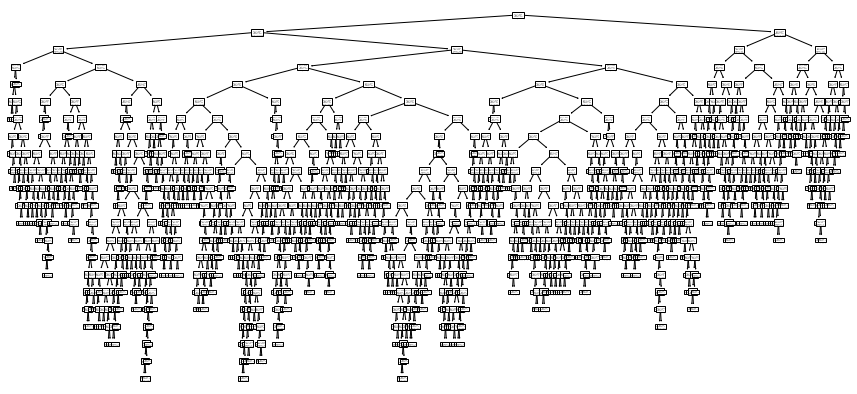

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plot_tree(dt)
plt.show()

1. 테스트조건
2. 불순도 : gini(criterion 매개변수 default)
3. 총샘플수 : samples
4. 클래스별 샘플수 : values

$$gini 불순도 = 1 -(음성클래스비율^2 + 양성클래스비율^2)$$
$$정보이득(information gain) = 부모의 불순도 - \frac{왼쪽노드의 샘플수}{부모의 샘플수}\times왼쪽노드의 불순도 - \frac{오른쪽노드의 샘플수}{부모의 샘플수}\times오른쪽노드의 불순도$$
여러가지 특성 중 information gain이 가장 낮은 특성을 가지고 루트노드를 설정한다.
한가지 특성에 대한 계산이 끝나면 다음 특성을 가지고 계산한다. </p>
참고 : 엔트로피 불순도(criterion='entropy')
$$엔트로피 불순도 = -음성클래스비율\times\log_2(음성클래스 비율) -양성클래스비율\times\log_2(양성클래스 비율)$$

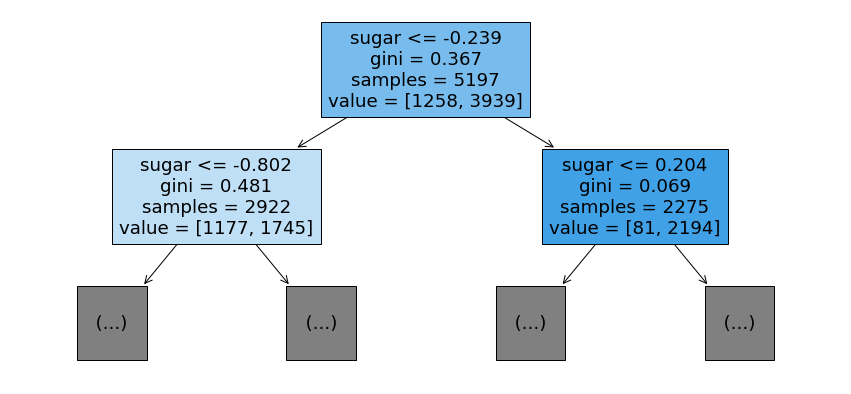

In [53]:
plt.figure(figsize=(15, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=cols)
plt.show()

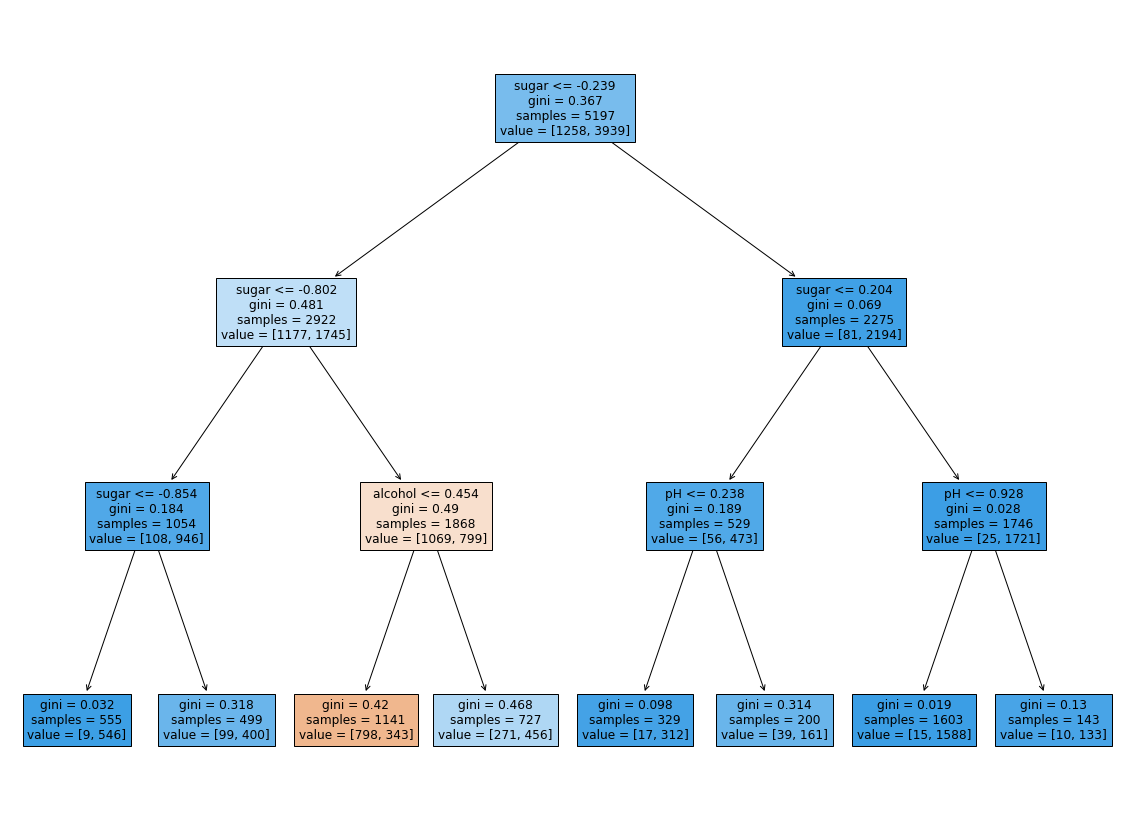

In [55]:
dt = DecisionTreeClassifier(max_depth=3, random_state = 42)
dt.fit(train_scaled, train_target)
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=cols)
plt.show()

In [57]:
dt = DecisionTreeClassifier(max_depth=3, random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


스케일 조정하지 않은 특성 사용

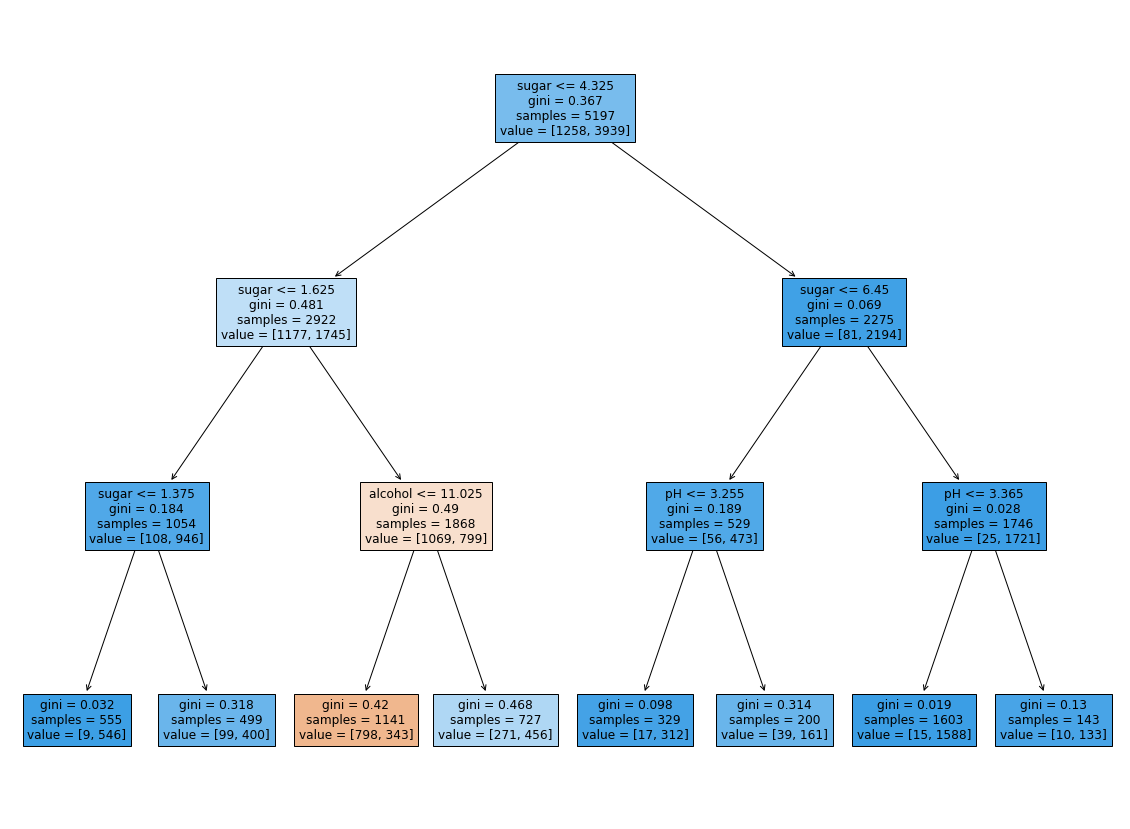

In [58]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=cols)
plt.show()

특성 중요도

In [59]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
